In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Files to load
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [3]:
#Read city file and create dataframe
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#Read ride file and create dataframe
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
#find cells that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [26]:
#get the number of data points per city type
print(sum(city_data_df['type']=="Urban"))
print(sum(city_data_df['type']=="Suburban"))
print(sum(city_data_df['type']=="Rural"))

66
36
18


In [10]:
#Inspect ride data files
print(ride_data_df.count())
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [39]:
#combine data into one dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [40]:
#Create the Urban city dataframe
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [43]:
#Create the Suburban city dataframe
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [44]:
#Create the Rural city dataframe
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [52]:
#Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [53]:
#Get the number of rides for suburban and rural cities
suburban_ride_count=suburban_cities_df.groupby(['city']).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(['city']).count()["ride_id"]

In [54]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [55]:
#Get average fare for cities in the suburban and rural cities
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
print(suburban_avg_fare.head())
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']
print(rural_avg_fare.head())

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [56]:
#Get the average number of drivers for each city type
urban_drive_count=urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_drive_count=suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_drive_count=rural_cities_df.groupby(['city']).mean()['driver_count']

urban_drive_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

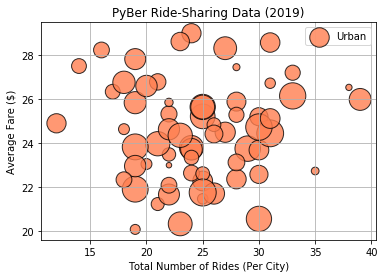

In [66]:
#Scatter plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,
           s=10*urban_drive_count, c='coral',
           edgecolor="k", linewidths=1,
           alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

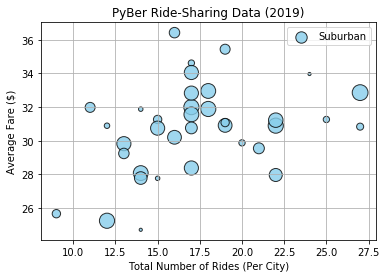

In [67]:
#Scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_drive_count, c='skyblue',
            edgecolor='k', linewidths=1,
            alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

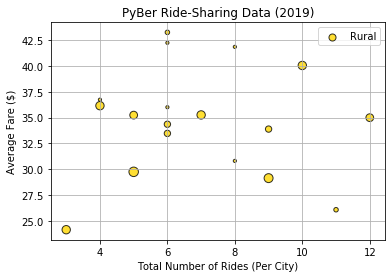

In [69]:
#Scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_drive_count, c='gold',
           edgecolor='k', linewidths=1,
            alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

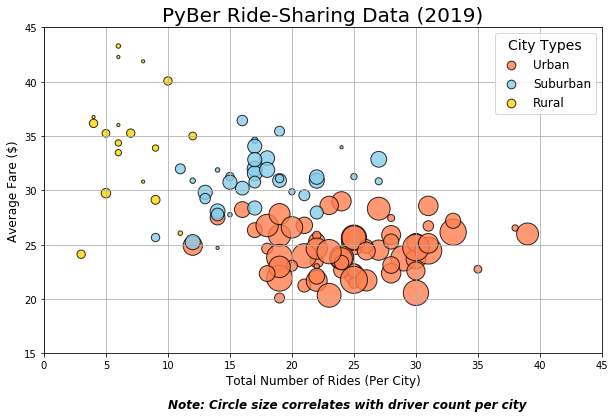

In [92]:
#Scatter plot for all city types
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,
           s=10*urban_drive_count, c='coral',
           edgecolor="k", linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_drive_count, c='skyblue',
            edgecolor='k', linewidths=1,
            alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_drive_count, c='gold',
           edgecolor='k', linewidths=1,
            alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fare ($)',fontsize=12)
plt.xlim(0,45)
plt.ylim(15,45)
plt.grid(True)

#legend formatting
lgnd=plt.legend(fontsize='12', mode="Expanded", scatterpoints=1,
               loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(14)

#Add note text referecing driver correlation
plt.text(10, 10, "Note: Circle size correlates with driver count per city", fontsize='12', style='italic', weight='bold')

#Save chart
plt.savefig('analysis/Fig1.png')

plt.show()